### General Instructions: 
- Due Date: Friday Jan 31, 5 PM 
- Submission: Please work on this Notebook and leave it in your account on the server. We have a crontab job which will copy your submission Notebook from your account at sharp 5 PM on Friday, Jan 31. Any changes made to Notebook after 5 PM, Friday, Jan 31 will not be reflected in the submitted assignment. DO NOT change the name or location of this file on the server.
- __Plagiarism will not be tolerated in any form. Zero points will be awarded for the entire assignment in such cases__.

In [3]:
# Answer 1:
import numpy as np
def get_fibonacci_term(n):
    '''
    Description: function to calucalte n-th term of the fibonacci sequence
    Input: n: term to calculate. 
           - The indexing will start from 1. So the first term is 1, 
           2nd is 1, 3rd is 2, 4th is 3, and so on.
           - implement a test to make sure that n >= 1 inside the function. 
           - if n <=0, print an error message     
    Output: term: value corresponding to the nth term
    '''
    
    # write your code here
    a = 0
    if n <= 0:
        print("Error")    
    elif n>=1:
        b = np.zeros(n+1)
        if a == 0:
            a = a+1
            b[1] = a
        for i in np.arange(2,n+1):
                b[i] = b[i-1] + b[i-2]
        return  b[n] #print(b[n]) -0.5
get_fibonacci_term(12)
get_fibonacci_term(-12)

Error


In [4]:
for j in range(1,15):
    print(get_fibonacci_term(j))

1.0
1.0
2.0
3.0
5.0
8.0
13.0
21.0
34.0
55.0
89.0
144.0
233.0
377.0


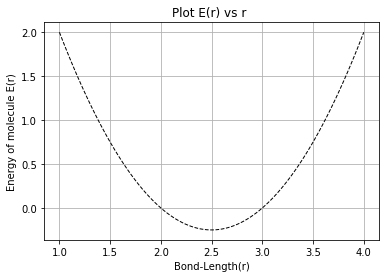

Bond_length at Min energy =  2.5
           r      E(r)
0   1.000000  2.000000
1   1.030303  1.910009
2   1.060606  1.821855
3   1.090909  1.735537
4   1.121212  1.651056
5   1.151515  1.568411
6   1.181818  1.487603
7   1.212121  1.408632
8   1.242424  1.331497
9   1.272727  1.256198
10  1.303030  1.182736
11  1.333333  1.111111
12  1.363636  1.041322
13  1.393939  0.973370
14  1.424242  0.907254
15  1.454545  0.842975
16  1.484848  0.780533
17  1.515152  0.719927
18  1.545455  0.661157
19  1.575758  0.604224
20  1.606061  0.549128
21  1.636364  0.495868
22  1.666667  0.444444
23  1.696970  0.394858
24  1.727273  0.347107
25  1.757576  0.301194
26  1.787879  0.257117
27  1.818182  0.214876
28  1.848485  0.174472
29  1.878788  0.135904
..       ...       ...
70  3.121212  0.135904
71  3.151515  0.174472
72  3.181818  0.214876
73  3.212121  0.257117
74  3.242424  0.301194
75  3.272727  0.347107
76  3.303030  0.394858
77  3.333333  0.444444
78  3.363636  0.495868
79  3.393939  0.549128
8

In [12]:
# Answer 2:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
r = np.linspace( 1, 4, 100 )
E = np.zeros(100)
table = []
for i in np.arange(100):
    E[i] = r[i]**2 - 5*r[i] + 6
table = pd.DataFrame({'r': r,'E(r)': E})
plt.plot(r, E, 'k--', linewidth=1.0)
plt.title('Plot E(r) vs r ')
plt.xlabel('Bond-Length(r)')
plt.ylabel("Energy of molecule E(r)")
plt.grid()                                               
plt.show()
def f(x):
    return  x**2 - 5*x + 6
result = optimize.minimize_scalar(f)
result.success 
Bond_length = result.x
print('Bond_length at Min energy = ',Bond_length )
print(table)

In [34]:
# Answer 3:

import os
import numpy as np
#xyz_filename = input('File name: ')
def from_xyz_to_POSCAR(xyz_filename):
    '''
    Description: function to read given file (whose filename is given as input) 
             and convert it into the POSCAR file. 
        The input file name is passed as an input to function.
    Input: xyz_filename; filename of xyz file to read the structure from
    Output: Name of the POSCAR file.
    '''
    with open(xyz_filename, "r") as f:
        lines = f.readlines()
        count = int(lines[0].split()[0])
        bad_chars = ['="', '"']
        test_string = lines[1]
        alat = []
        for i in bad_chars : 
            test_string = test_string.replace(i, ' ') 
        for i in range(1,10):
            carti = test_string.split()[i]
            alat.append(float(carti))
        alat = np.array(alat)
        alat = np.reshape(alat, (3, 3))     
        for i in bad_chars : 
            test_string = test_string.replace(i, ' ') 
        coord = []
        symb = dict()
        for i in range(2,(count+2)):
            a = lines[i].split()
            for j in range(1,4):
                coord.append(float(a[j]))
                c = np.array(coord)
        coord = np.reshape(c, (24, 3)) ### cannot hardcode the values -3
        for k in range(2,(count+2)):
            b = lines[k].split()[0]
            if b in symb:
                symb[b] = symb[b] + 1
                continue
            else:
                symb[b] = 1
    xyz_POSCAR = "POSCARe"#input("Output file name: ")  ##------ forgot to put the symbol line -3
    with open(xyz_POSCAR, "w") as f1:
        for atom in symb:
            f1.write("%s  " % atom)
        f1.write("\n")
        a = 1 #float(input("Scale Factor :"))
        f1.write("%f\n" % a)
        #for i in range(3): ###----why this?
        for val in symb.values():
            f1.write("  %d  " % val )
        f1.write("\n")
        #f1.write("Cartesian \n")
        f1.write("%s \n" % ("Cartesian")) 
        for i in range(count):
            f1.write("   %f      %f      %f\n" % (coord[i][0], coord[i][1], coord[i][2]))
    return xyz_POSCAR
#from_xyz_to_POSCAR(xyz_filename)
## doesnot arrange atoms w.r.t elements if not in order -3
## random errors -2

In [35]:
#from_xyz_to_POSCAR("structure.xyz")
xyz_file = 'structure.xyz'
poscar_file = from_xyz_to_POSCAR(xyz_file)



In [1]:
# Answer 4:
import numpy as np
import mywrapper
import warnings
import pandas as pd
import matplotlib.pyplot as plt

epsilon = 1.67e-21
sigma = 3.4e-10
cutoff = 3.5*sigma
alat  = np.linspace( 5.1, 5.4, 50 )
alats = np.linspace( 5.1, 5.4, 50 )*1e-10
V = alats**3
E = []
Energy = []
for a in alats:
    energy = mywrapper.get_LJEnergy(a, epsilon, sigma, cutoff)
    E.append(energy)
    EeV = energy/(1.60218e-19)
    Energy.append(EeV)
    
table_latconstvsE= pd.DataFrame({'lattice constant(Angstrom)': alat,'Energy(eV)': Energy})
c = np.polyfit(V, E, 3)
Eq = np.poly1d(c)
P = -1*np.polyder(Eq)
Pressure = []
for i in V:
    P_GPa = P(i)*1e-9
    Pressure.append(P_GPa)
table_latconstvsP = pd.DataFrame({'lattice constant(Angstrom)': alat,'Pressure(GPa)': Pressure})
U1= np.polyder(Eq,2) ##U1
H = V[np.argmin(E)]
print('relaxed volume: ',H)
Bulk_modulus = H * (U1(H))
Bulk_modulus = Bulk_modulus*1e-9
print("Bulk modulus: ",Bulk_modulus)
print(table_latconstvsE)
print(table_latconstvsP)


AttributeError: module 'mywrapper' has no attribute 'get_LJEnergy'

In [27]:
a = 9.5
b = 15
c = 12 + 7
d = 10+10+10 
k = a+b+c+d
print(k)

73.5
